<a href="https://colab.research.google.com/github/MraVariable/AymptoticExtrapolation/blob/master/flight_with_asymptote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DataSet  #TODO EDIT PATH ACCORDING TO OS
import pandas as pd
import numpy as np
df19=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Jan_2019_ontime.csv')
df20=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Jan_2020_ontime.csv')
df19.drop('Unnamed: 21',axis=1,inplace=True)
df20.drop('Unnamed: 21',axis=1,inplace=True)
#Merge two DataFrames
frames = [df19, df20]
df = pd.concat(frames)
df.reset_index(drop=True, inplace=True)



In [2]:
#Visualising DataSets
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pl_1=df.groupby('DAY_OF_MONTH')['CANCELLED'].count()
fig = go.Figure()
fig.add_trace(go.Bar(x=pl_1.index,y=pl_1.values,name='Cancelled'))
fig.add_trace(go.Scatter(x=pl_1.index, y=pl_1.values, line=dict(color='red'), name='Cancel trend'))
fig.update_layout(
    title="Cancelled flights vs day of month",
    xaxis_title="Day of month",
    yaxis_title="Cancel count",
)
fig.show()

In [3]:
pl_2=df.groupby('OP_CARRIER')['CANCELLED'].count()
fig = go.Figure()
fig.add_trace(go.Bar(x=pl_1.index,y=pl_2.values,name='Cancelled'))
fig.add_trace(go.Scatter(x=pl_1.index, y=pl_2.values, line=dict(color='red'), name='Cancel trend'))
fig.update_layout(
    title="Cancelled flights vs IATA code of flight",
    xaxis_title="IATA CODE",
    yaxis_title="Cancel count",
)
fig.show()

In [4]:
#PreProcess DataSet
#Pad the NaN Values
df = df.fillna(method ='pad')
df1 = df[['OP_CARRIER','ORIGIN','DEST','DAY_OF_MONTH','DEP_TIME','ARR_TIME','DISTANCE','CANCELLED']]
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
pd.options.mode.chained_assignment = None
df1['OP_CARRIER']= label_encoder.fit_transform(df1['OP_CARRIER'])
df1['ORIGIN']= label_encoder.fit_transform(df1['ORIGIN'])
df1['DEST']= label_encoder.fit_transform(df1['DEST'])
X=df1.drop('CANCELLED',axis=1)
y=df1['CANCELLED']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)


In [5]:
#Importing Tensorflow 

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential

#Creating the Prediction Model
def createExpModel():
  model = Sequential([ Dense(32, activation='relu', input_shape=(7,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])
  return model
flightModel = createExpModel()
flightModel.compile(optimizer = 'sgd', loss= 'binary_crossentropy', metrics = ['accuracy'])

#Ensuring Same initialisation for both Inbuilt model.fit and out training method
from copy import deepcopy
flightModelAsym=deepcopy(flightModel)

In [7]:
#Training the Model using Inbuilt model.fit method
hist = flightModel.fit(X_train, y_train,batch_size=32, epochs=100,validation_data=(X_test, y_test))

Epoch 1/10
29784/29784 [==============================] - 38s 1ms/step - loss: 0.0989 - accuracy: 0.9802 - val_loss: 0.1009 - val_accuracy: 0.9799
Epoch 2/10
29784/29784 [==============================] - 38s 1ms/step - loss: 0.0988 - accuracy: 0.9802 - val_loss: 0.1007 - val_accuracy: 0.9799
Epoch 3/10
29784/29784 [==============================] - 38s 1ms/step - loss: 0.0988 - accuracy: 0.9802 - val_loss: 0.0996 - val_accuracy: 0.9799
Epoch 4/10
29784/29784 [==============================] - 39s 1ms/step - loss: 0.0988 - accuracy: 0.9802 - val_loss: 0.0994 - val_accuracy: 0.9799
Epoch 5/10
29784/29784 [==============================] - 38s 1ms/step - loss: 0.0988 - accuracy: 0.9802 - val_loss: 0.1127 - val_accuracy: 0.9799
Epoch 6/10
29784/29784 [==============================] - 38s 1ms/step - loss: 0.0988 - accuracy: 0.9802 - val_loss: 0.0989 - val_accuracy: 0.9799
Epoch 7/10
29784/29784 [==============================] - 37s 1ms/step - loss: 0.0988 - accuracy: 0.9802 - val_loss: 0

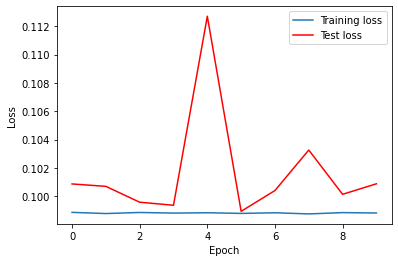

In [8]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], color='red', label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Asymptotic Training

#Training For A few Epochs
trackingArray = []
batch_size = 20
epochs = 1
for epoch in range(epochs):
    for i in range(0,X_train.shape[0]-5,15):
        flightModelAsym.fit(X_train[i:i+batch_size],y_train[i:i+batch_size],verbose=0)
        trackingArray.append(np.array(flightModelAsym.get_weights()))